In [53]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import gmean
import scipy.stats as stats
import statsmodels.api as sm
from statistics import median, mean, stdev
import seaborn as sns
from scipy import stats 
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
import math
from scipy.stats import gmean
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller,kpss

In [54]:
#!pip uninstall pandas
#!pip install --upgrade pandas==1.2.4
#!pip install --user  pandas

In [55]:
A = pd.read_csv('C:/Users/jlouv/ABA-Spring2023/Data/Pickle Files/Processed_Dataframes/Disease_Proc_df.csv')

In [56]:
A.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [57]:
A['State'] == 'CA'

0      False
1      False
2      False
3      False
4      False
       ...  
619    False
620    False
621    False
622    False
623    False
Name: State, Length: 624, dtype: bool

In [58]:
cal1 = A[(A['State'] == 'CA')]
tex1 =  A[(A['State'] == 'TX') ]
ny1=   A[(A['State'] == 'NY')]

In [59]:
ny1.reset_index(inplace = True)
cal1.reset_index(inplace = True)
tex1.reset_index(inplace = True)

In [60]:
ny1.set_index('Year', inplace = True)
cal1.set_index('Year', inplace = True)
tex1.set_index('Year', inplace = True)

In [61]:
ny1.drop(['index', 'State',  'StateDesc'], axis = 1, inplace = True)
cal1.drop(['index', 'State',  'StateDesc'],axis = 1, inplace = True)
tex1.drop(['index', 'State',  'StateDesc'],axis = 1, inplace = True)

In [62]:
cal = cal1[:-4]
tex = tex1[:-4]
ny = ny1[:-4]

In [63]:
ny

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,11.250000,160.350,139.8000,8.300000,45.8000,66.900000,18.6000
2009,11.300000,156.800,140.2750,8.275000,45.1750,66.600000,18.8500
2010,11.383333,153.100,140.7500,8.216667,44.7000,66.216667,19.0000
2011,11.475000,150.125,141.6625,8.175000,44.2625,66.012500,19.1625
2012,11.590000,147.340,142.3000,8.160000,43.9200,65.810000,19.2600
2013,11.810000,142.740,143.8100,8.140000,43.2600,65.470000,19.5200
2014,12.050000,140.100,145.4400,8.100000,42.7600,65.230000,19.6600
2015,12.300000,140.070,147.3600,8.080000,42.3600,65.170000,19.7900


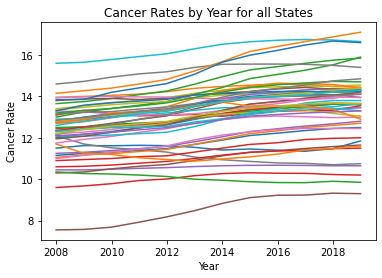

In [64]:
import matplotlib.pyplot as plt

# group the data by state
state_groups = A.groupby('State')

# plot each state's cancer rates over time
for state, group in state_groups:
    plt.plot(group['Year'], group['CAN10_1'], label=state)
    #plot_acf(group['CAN10_1'], label = state)
    #plot_pacf(group['CAN10_1'].squeeze(), lags = 5, title = state)

# add plot title and axis labels
plt.title('Cancer Rates by Year for all States')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')

plt.show()

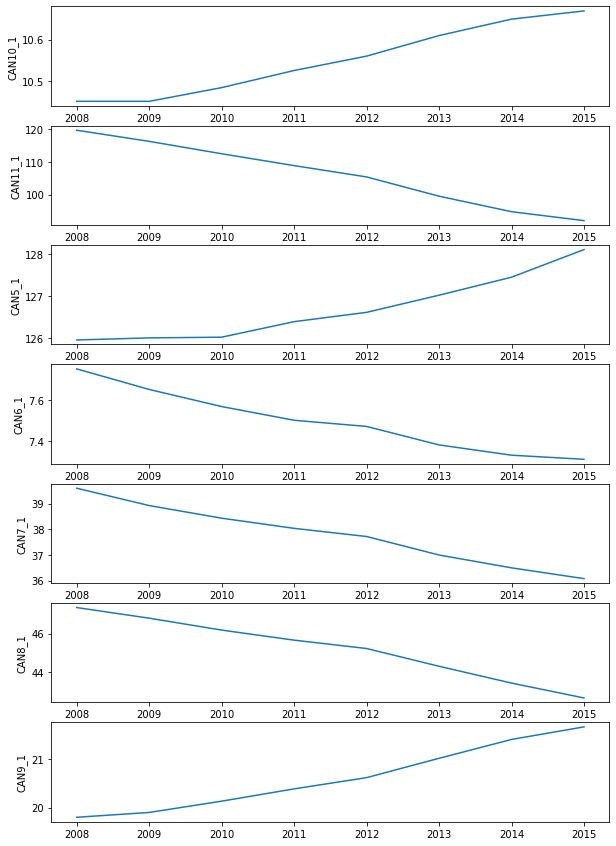

In [65]:
fig, axes = plt.subplots(7, 1, figsize=(10, 15))

axes[0].plot(cal['CAN10_1'])
axes[0].set_ylabel('CAN10_1')

axes[1].plot(cal['CAN11_1'])
axes[1].set_ylabel('CAN11_1')

axes[2].plot(cal['CAN5_1'])
axes[2].set_ylabel('CAN5_1')

axes[3].plot(cal['CAN6_1'])
axes[3].set_ylabel('CAN6_1')

axes[4].plot(cal['CAN7_1'])
axes[4].set_ylabel('CAN7_1')

axes[5].plot(cal['CAN8_1'])
axes[5].set_ylabel('CAN8_1')

axes[6].plot(cal['CAN9_1'])
axes[6].set_ylabel('CAN9_1')

plt.show()

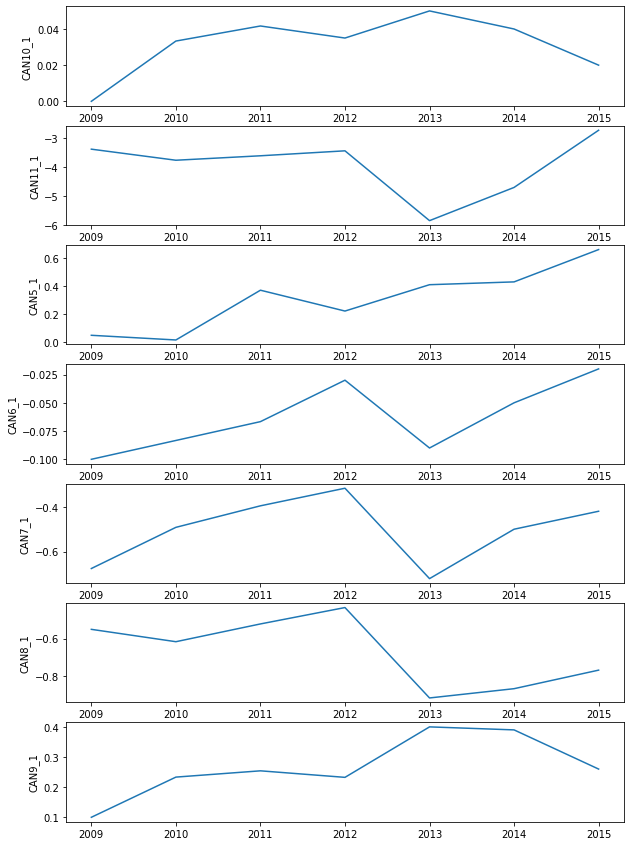

In [66]:
fig, axes = plt.subplots(7, 1, figsize=(10, 15))

axes[0].plot(cal['CAN10_1'].diff().dropna())
axes[0].set_ylabel('CAN10_1')

axes[1].plot(cal['CAN11_1'].diff().dropna())
axes[1].set_ylabel('CAN11_1')

axes[2].plot(cal['CAN5_1'].diff().dropna())
axes[2].set_ylabel('CAN5_1')

axes[3].plot(cal['CAN6_1'].diff().dropna())
axes[3].set_ylabel('CAN6_1')

axes[4].plot(cal['CAN7_1'].diff().dropna())
axes[4].set_ylabel('CAN7_1')

axes[5].plot(cal['CAN8_1'].diff().dropna())
axes[5].set_ylabel('CAN8_1')

axes[6].plot(cal['CAN9_1'].diff().dropna())
axes[6].set_ylabel('CAN9_1')

plt.show()

In [67]:
cal.columns

Index(['CAN10_1', 'CAN11_1', 'CAN5_1', 'CAN6_1', 'CAN7_1', 'CAN8_1', 'CAN9_1'], dtype='object')

In [68]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in ny.columns: 
    #print(adfuller(cal[i].diff().dropna())[1])
    adf_result = adfuller(ny[i].dropna())
    print('ADF Statistic: ', adf_result[0])
    print('p-value: ', adf_result[1])

ADF Statistic:  210.4377932247692
p-value:  1.0
ADF Statistic:  -6.205078120385623
p-value:  5.683663692855112e-08
ADF Statistic:  2.6397485546894686
p-value:  0.9990814536386641
ADF Statistic:  -2.732019815959853
p-value:  0.0686594358159414
ADF Statistic:  -0.7634728432278227
p-value:  0.8296169392893501
ADF Statistic:  -3.690387640779022
p-value:  0.004250410188063392
ADF Statistic:  -1.0771776056108533
p-value:  0.7240868810415038


In [69]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in cal.columns: 
    kpss_result = kpss(cal[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.4826742250959648
p-value:  0.045568868221629553
KPSS Statistic:  0.4938988658853872
p-value:  0.04304079597175965
KPSS Statistic:  0.47726321132871535
p-value:  0.046787565016055105
KPSS Statistic:  0.4935233383263129
p-value:  0.043125374250830434
KPSS Statistic:  0.5004914303684741
p-value:  0.04155598415124458
KPSS Statistic:  0.49590250695029187
p-value:  0.04258952546164598
KPSS Statistic:  0.487796593699484
p-value:  0.044415181599215314


In [70]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in tex.columns: 
    kpss_result = kpss(tex[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.48285046626868766
p-value:  0.04552917426380909
KPSS Statistic:  0.47857292569464954
p-value:  0.046492584303006866
KPSS Statistic:  0.40093671200972986
p-value:  0.07675141723718541
KPSS Statistic:  0.20020555935117293
p-value:  0.1
KPSS Statistic:  0.4739891239002396
p-value:  0.04752497209454063
KPSS Statistic:  0.4980024024259721
p-value:  0.04211657603018647
KPSS Statistic:  0.1731423058073987
p-value:  0.1


In [71]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in ny.columns: 
    kpss_result = kpss(ny[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.47931814819236834
p-value:  0.046324741398115245
KPSS Statistic:  0.4884887190091453
p-value:  0.04425929752046277
KPSS Statistic:  0.48319244858287647
p-value:  0.04545215122007287
KPSS Statistic:  0.4887250865583902
p-value:  0.044206061585948156
KPSS Statistic:  0.5001323676562547
p-value:  0.04163685413147417
KPSS Statistic:  0.49165307385345425
p-value:  0.04354660498796076
KPSS Statistic:  0.5008298604358978
p-value:  0.041479761163086076


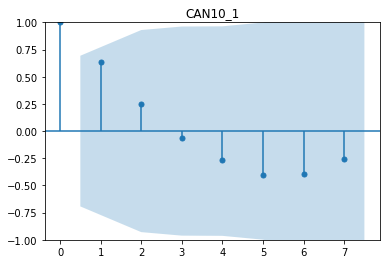

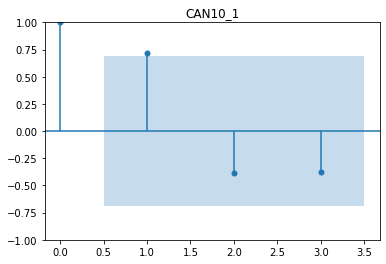

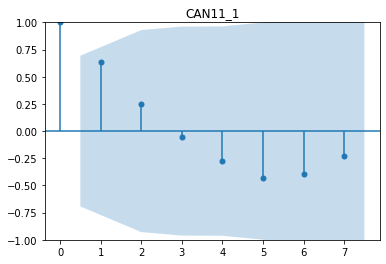

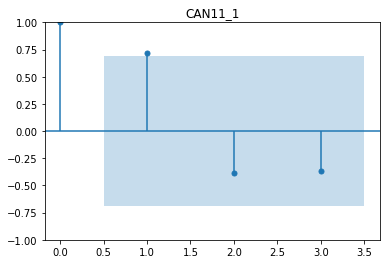

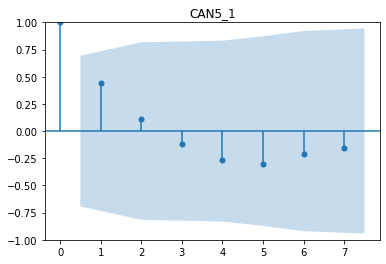

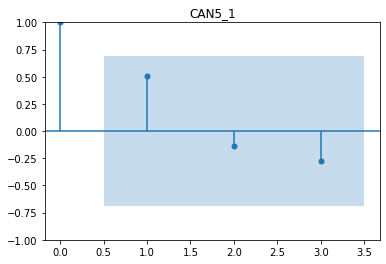

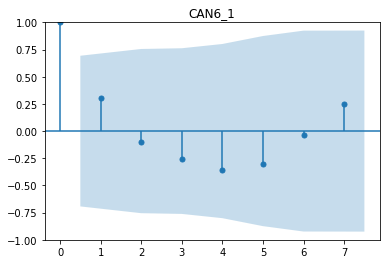

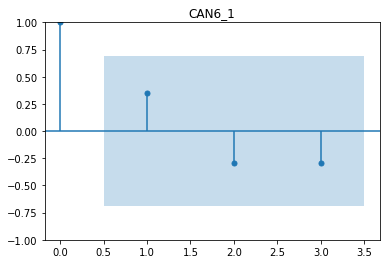

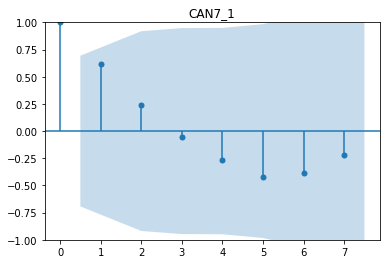

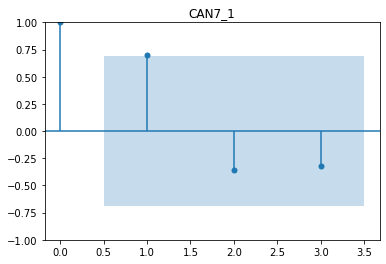

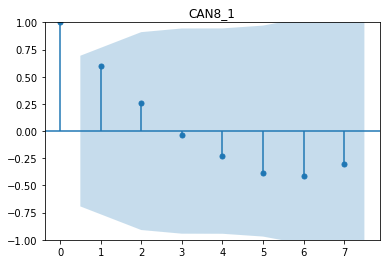

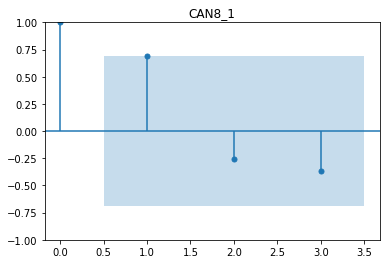

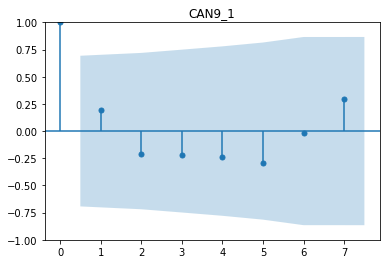

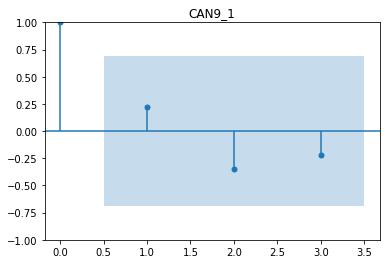

In [72]:
for i in cal.columns: 
    plot_acf(tex[i], title = i)
    plot_pacf(tex[i], lags = 3, title = i)
    plt.show()

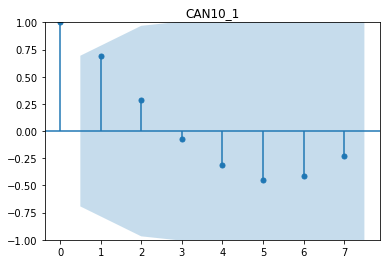

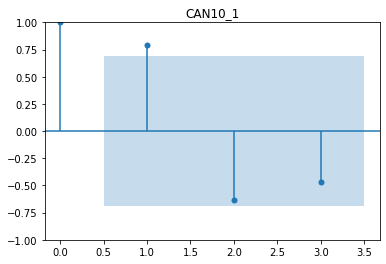

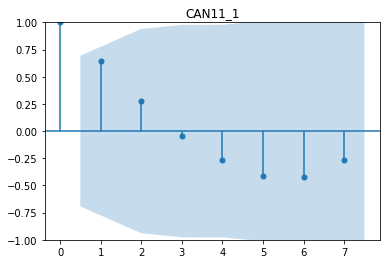

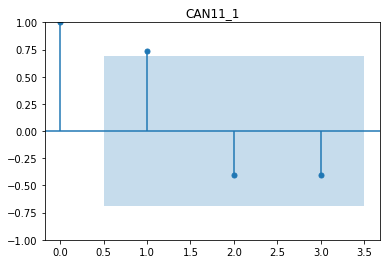

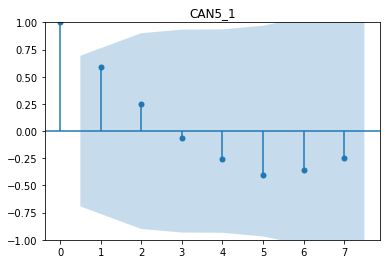

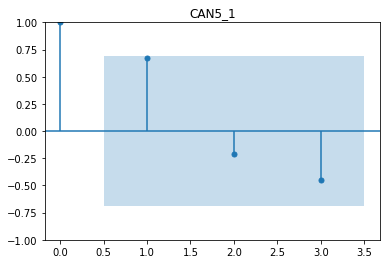

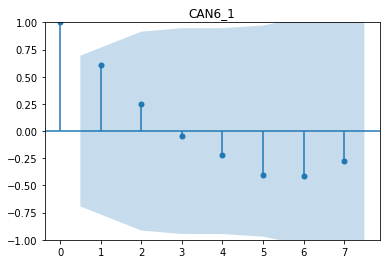

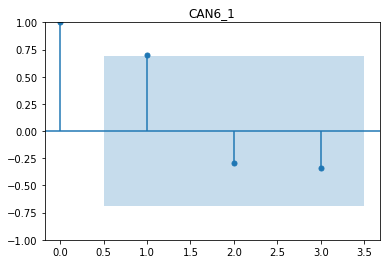

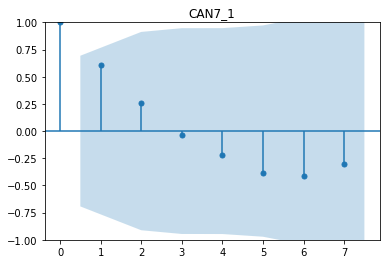

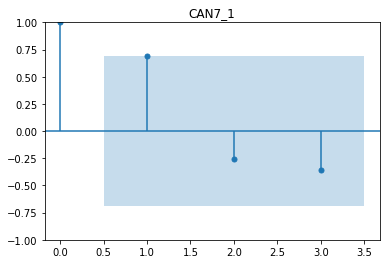

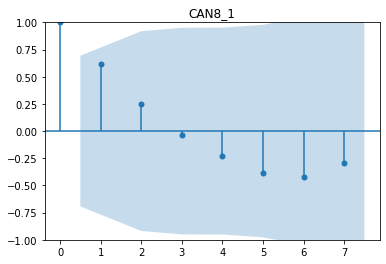

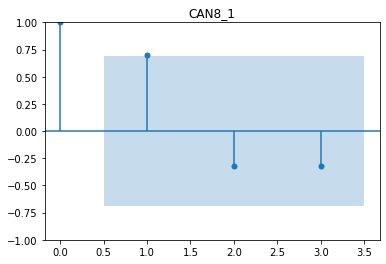

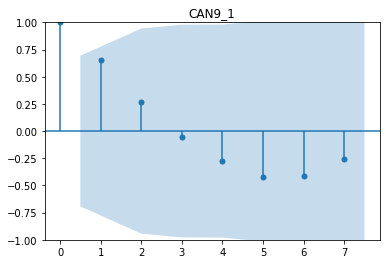

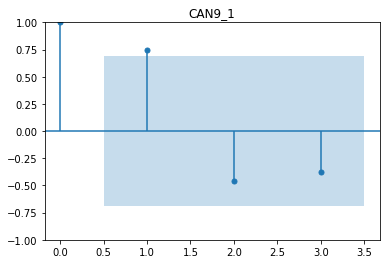

In [73]:
for i in cal.columns: 
    plot_acf(cal[i], title = i)
    plot_pacf(cal[i], lags = 3, title = i)
    plt.show()

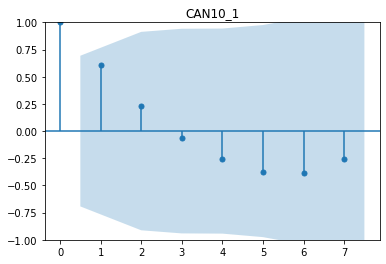

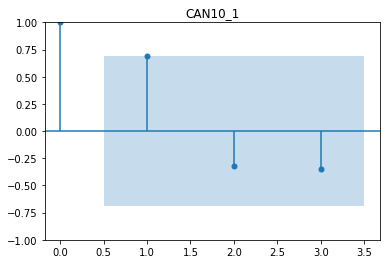

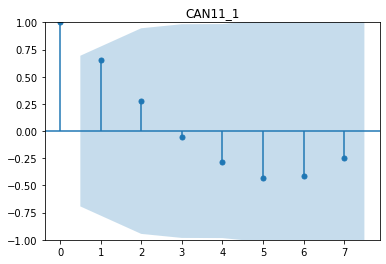

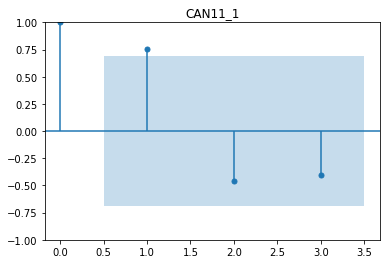

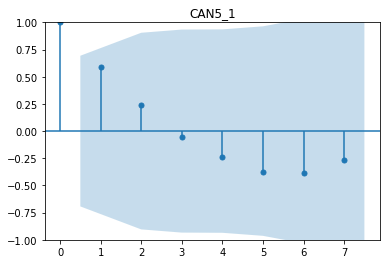

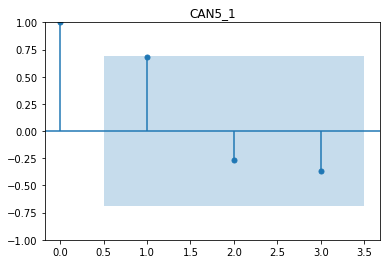

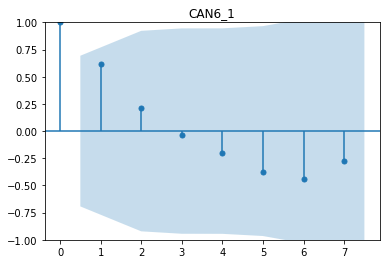

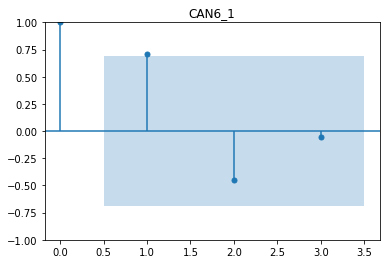

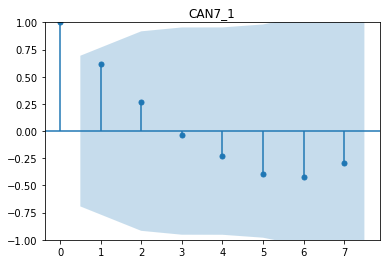

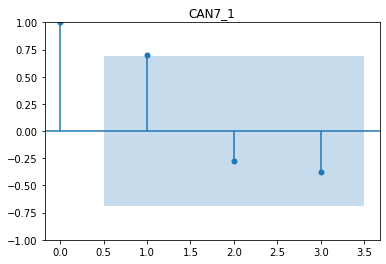

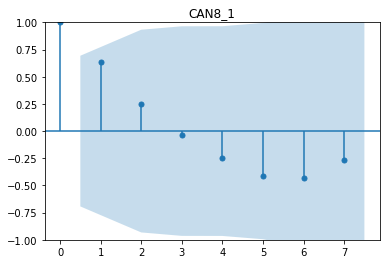

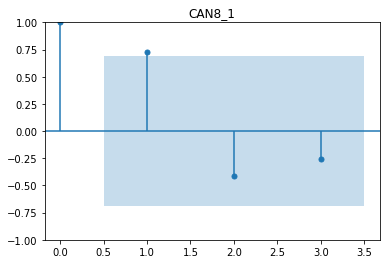

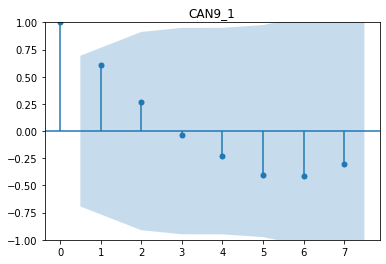

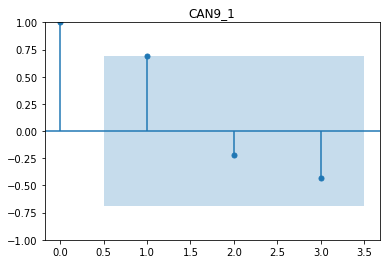

In [74]:
for i in ny.columns: 
    plot_acf(ny[i], title = i)
    plot_pacf(ny[i], lags = 3, title = i)
    plt.show()

In [75]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [76]:
for column in cal.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(cal[column], seasonal=False, suppress_warnings=True)
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=3)
    print(f"Predictions for \n{column}: {forecast}")
    # Get the MAE 
    print('MAE: ',mean_absolute_error(cal1[column][-4:-1], forecast))
 
    # Get the MSE 
    print('MSE: ',mean_squared_error(cal1[column][-4:-1], forecast))

    print('R squered: ',r2_score(cal1[column][-4:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN10_1: 8     10.678818
9     10.677286
10    10.667001
dtype: float64
MAE:  0.10236828059529342
RMSE:  0.011780894208972001
R squered:  -0.2847939357030971
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN11_1: 8     90.883899
9     91.179002
10    92.884422
dtype: float64
MAE:  1.1120286826804944
RMSE:  1.5824657698826659
R squered:  -97.93127556939275
Column: CAN5_1, ARIMA Model: (1, 0, 1)
Predictions for 
CAN5_1: 8     128.387324
9     128.386493
10    128.385661
dtype: float64
MAE:  0.46344250188802305
RMSE:  0.24773032334820505
R squered:  -0.4018846529591611
Column: CAN6_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN6_1: 8     7.339445
9     7.408657
10    7.500251
dtype: float64
MAE:  0.3345906450903708
RMSE:  0.132454761265438
R squered:  -504.2747969183218
Column: CAN7_1, ARIMA Model: (2, 0, 0)
Predictions for 
CAN7_1: 8     35.854946
9     35.826898
10    35.982195
dtype: float64
MAE:  0.44408955653748267
R

In [77]:
cal1

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,10.450000,119.550000,125.950000,7.750000,39.600000,47.350000,19.800000
2009,10.450000,116.175000,126.000000,7.650000,38.925000,46.800000,19.900000
2010,10.483333,112.416667,126.016667,7.566667,38.433333,46.183333,20.133333
2011,10.525000,108.812500,126.387500,7.500000,38.037500,45.662500,20.387500
2012,10.560000,105.380000,126.610000,7.470000,37.720000,45.230000,20.620000
2013,10.610000,99.530000,127.020000,7.380000,37.000000,44.310000,21.020000
2014,10.650000,94.830000,127.450000,7.330000,36.500000,43.440000,21.410000
2015,10.670000,92.110000,128.110000,7.310000,36.080000,42.670000,21.670000
2016,10.675000,90.637500,128.262500,7.312500,35.887500,42.312500,21.800000


In [78]:
for column in tex.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(tex[column], seasonal=False, error_action="ignore")
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=3)
    print(f"Predictions for {column}: {forecast}")
    
    # Get the MAE 
    print('MAE: ',mean_absolute_error(tex1[column][-4:-1], forecast))
 
    # Get the MSE 
    print('MSE: ',mean_squared_error(tex1[column][-4:-1], forecast))

    print('R squered: ',r2_score(tex1[column][-4:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for CAN10_1: 8     11.376921
9     11.380401
10    11.312825
dtype: float64
MAE:  0.2663718876729482
RMSE:  0.0963049866107262
R squered:  -3.394861783596218
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for CAN11_1: 8      98.786570
9     101.747347
10    105.028512
dtype: float64
MAE:  1.8146712569657375
RMSE:  3.5340596188391977
R squered:  -6.758319495770027
Column: CAN5_1, ARIMA Model: (1, 0, 1)
Predictions for CAN5_1: 8     117.997261
9     117.994913
10    117.992565
dtype: float64
MAE:  0.7855888226049622
RMSE:  0.7721596785047132
R squered:  -0.7449862643164806
Column: CAN6_1, ARIMA Model: (1, 0, 1)
Predictions for CAN6_1: 8     9.279488
9     9.279460
10    9.279432
dtype: float64
MAE:  0.15718297324272892
RMSE:  0.029226155648650744
R squered:  -2.514291915882372
Column: CAN7_1, ARIMA Model: (2, 0, 0)
Predictions for CAN7_1: 8     37.961688
9     38.208308
10    38.418176
dtype: float64
MAE:  0.5453864414597706
RMSE: 

In [80]:
for column in ny.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(ny[column], seasonal=False, suppress_warnings=True)
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=3)
    print(f"Predictions for {column}: {forecast}")
    # Get the MAE 
    print('MAE: ',mean_absolute_error(ny1[column][-4:-1], forecast))
 
    # Get the MSE 
    print('MSE: ',mean_squared_error(ny1[column][-4:-1], forecast))

    print('R squered: ',r2_score(ny1[column][-4:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for CAN10_1: 8     12.537935
9     12.751752
10    12.930907
dtype: float64
MAE:  0.42482425114225303
RMSE:  0.19133904273539734
R squered:  -2.8843532984255233
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for CAN11_1: 8     141.669490
9     144.563926
10    148.267045
dtype: float64
MAE:  1.908719303557738
RMSE:  3.9264537123381418
R squered:  -9.05062021426388
Column: CAN5_1, ARIMA Model: (2, 0, 1)
Predictions for CAN5_1: 8     149.141380
9     150.822647
10    152.408791
dtype: float64
MAE:  1.2896362639945347
RMSE:  1.741870560356955
R squered:  -3.5406587893228334
Column: CAN6_1, ARIMA Model: (2, 0, 1)
Predictions for CAN6_1: 8     8.096647
9     8.126198
10    8.156870
dtype: float64
MAE:  0.24757626184767653
RMSE:  0.08023061480249487
R squered:  -6.907383138251968
Column: CAN7_1, ARIMA Model: (1, 0, 1)
Predictions for CAN7_1: 8     42.084728
9     42.166253
10    42.244294
dtype: float64
MAE:  0.42360345637974683
RMSE: 

 R-squared score to take a negative value if the model performs worse than a horizontal line (i.e., a model that simply predicts the mean value of the outcome variable for all observations). This can happen if the model is overfitting to noise in the data, or if the data is inherently noisy or unpredictable. In such cases, the negative R-squared score indicates that the model is not useful for predicting the outcome variable

Simple Exponential smoothing

In [81]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [84]:
# Loop over each column in the DataFrame
for column in cal.columns:
    # Get the time series data for the column
    ts = cal[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=3)
        mse = mean_squared_error(cal1[column][-4:-1], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=3)
    mse = mean_squared_error(cal1[column][-4:-1], y_pred)
    Rsquared = r2_score(cal1[column][-4:-1], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.8
Forecast: 8     10.663929
9     10.663929
10    10.663929
dtype: float64
Mean squared error: 0.00010802626339350288
R squared: -816949.3576027951
Column: CAN11_1
Optimal alpha: 0.9
Forecast: 8     92.435233
9     92.435233
10    92.435233
dtype: float64
Mean squared error: 4.116762841571113
R squared: -195550.80792852116
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 8     128.039264
9     128.039264
10    128.039264
dtype: float64
Mean squared error: 0.2730183406391845
R squared: -268718.2827075636
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 8     7.312594
9     7.312594
10    7.312594
dtype: float64
Mean squared error: 0.00010573812243314931
R squared: -4684509.050161949
Column: CAN7_1
Optimal alpha: 0.9
Forecast: 8     36.127756
9     36.127756
10    36.127756
dtype: float64
Mean squared error: 0.19150026709299026
R squared: -12858.820642681394
Column: CAN8_1
Optimal alpha: 0.9
Forecast: 8     42.756669
9     42.756669
10    42.756669
dtype: float64
M

In [ ]:
# Loop over each column in the DataFrame
for column in tex.columns:
    # Get the time series data for the column
    ts = tex[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=3)
        mse = mean_squared_error(tex1[column][-4:-1], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=3)
    mse = mean_squared_error(tex1[column][-4:-1], y_pred)
    Rsquared = r2_score(tex1[column][-4:-1], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

In [ ]:
# Loop over each column in the DataFrame
for column in ny.columns:
    # Get the time series data for the column
    ts = ny[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=2)
        mse = mean_squared_error(ny1[column][-2:], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=2)
    mse = mean_squared_error(ny1[column][-2:], y_pred)
    Rsquared = r2_score(ny1[column][-2:], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

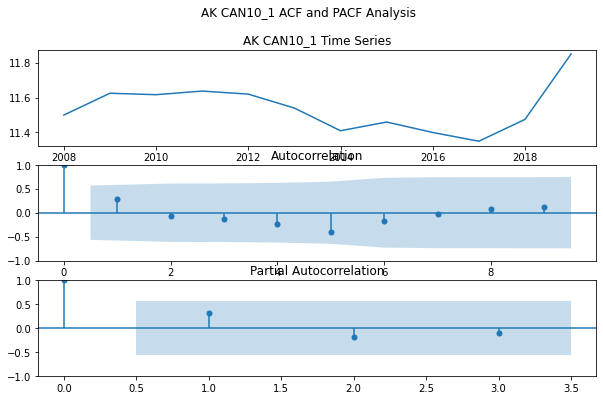

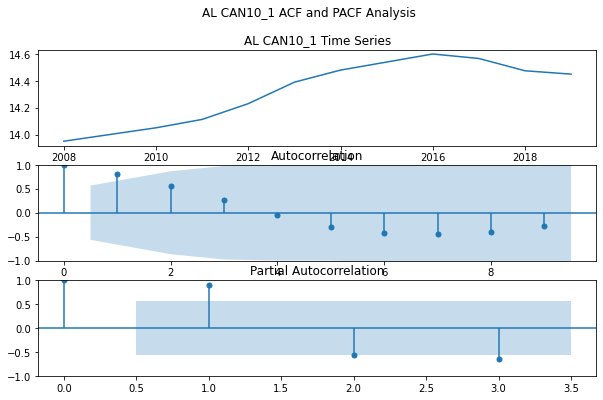

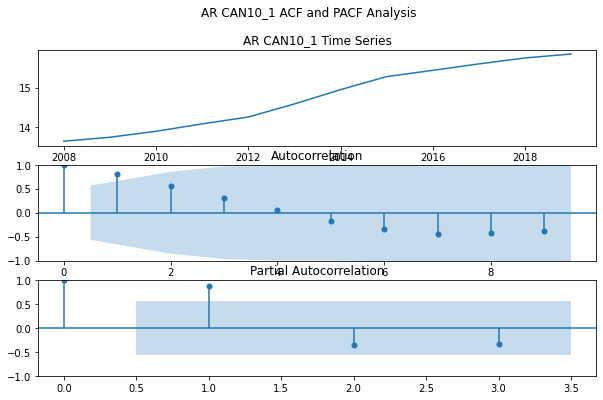

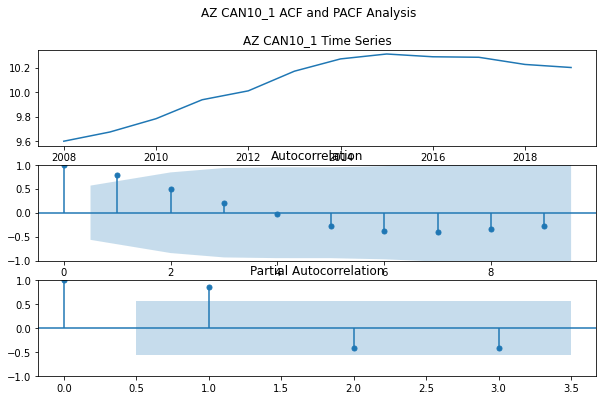

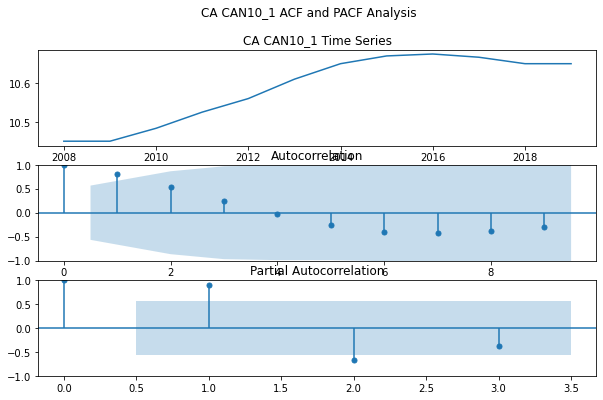

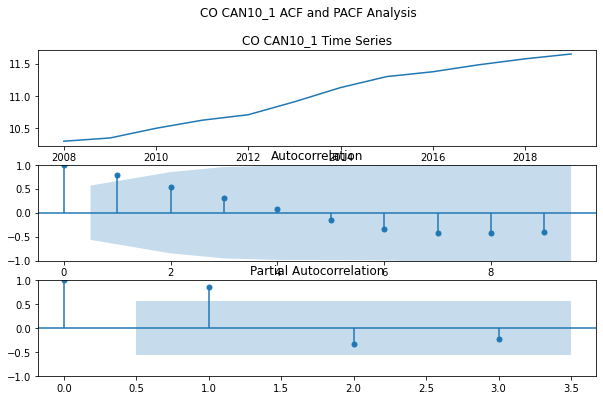

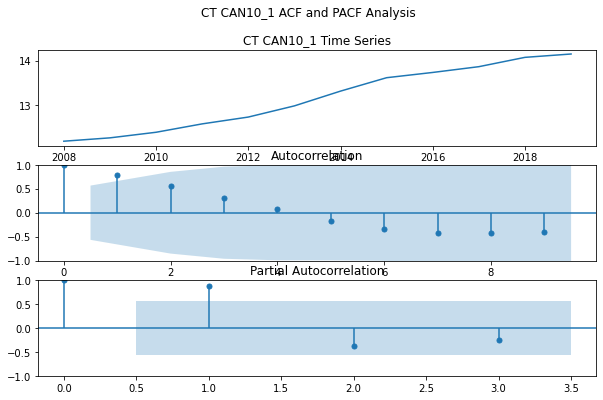

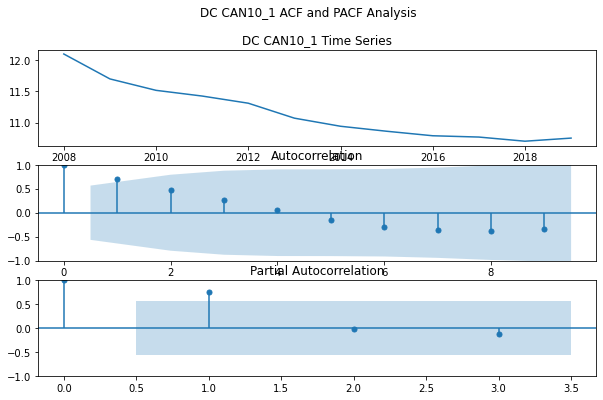

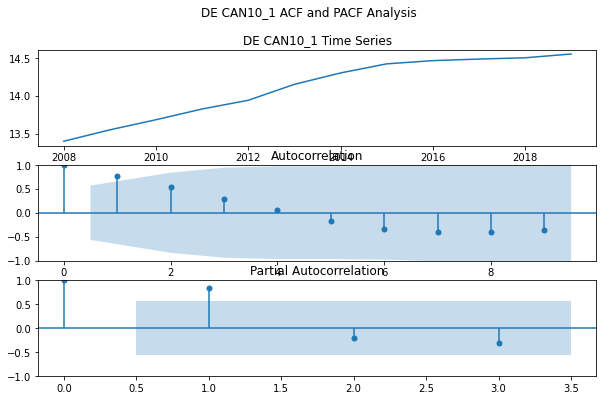

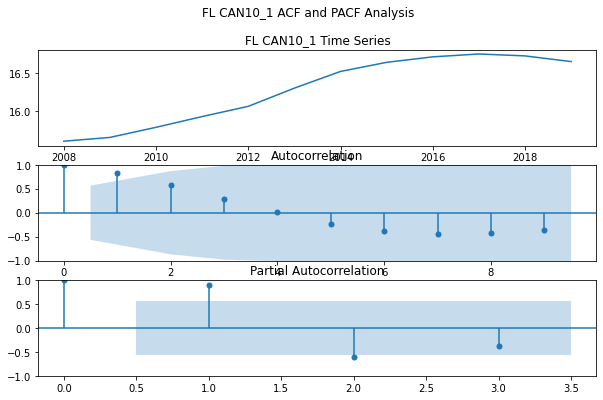

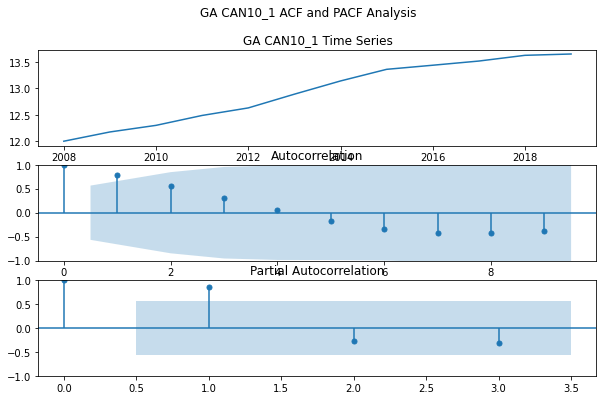

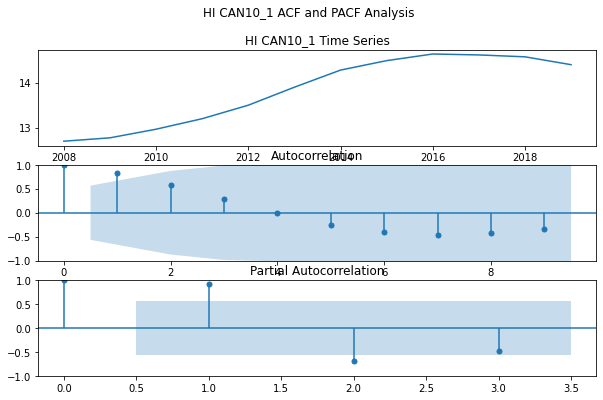

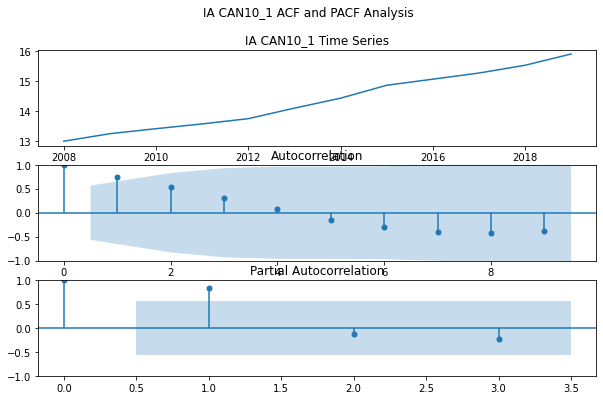

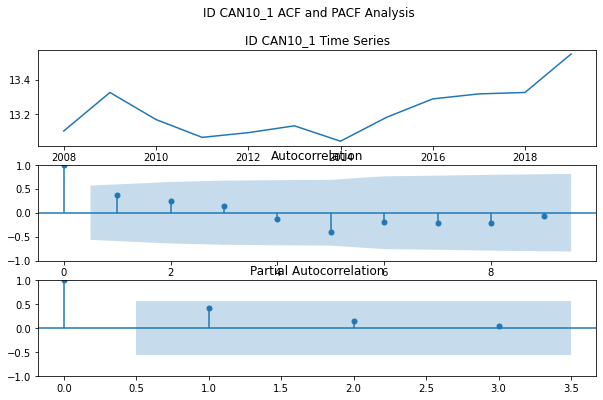

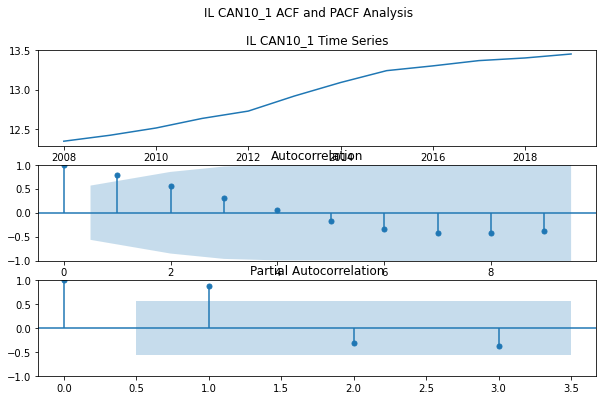

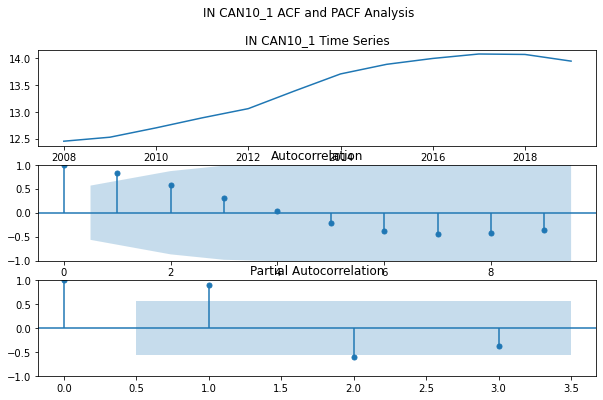

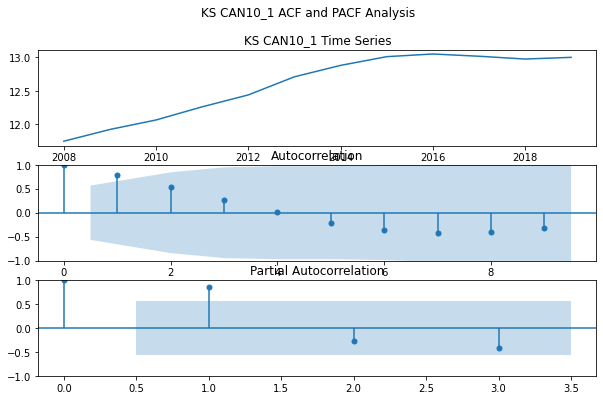

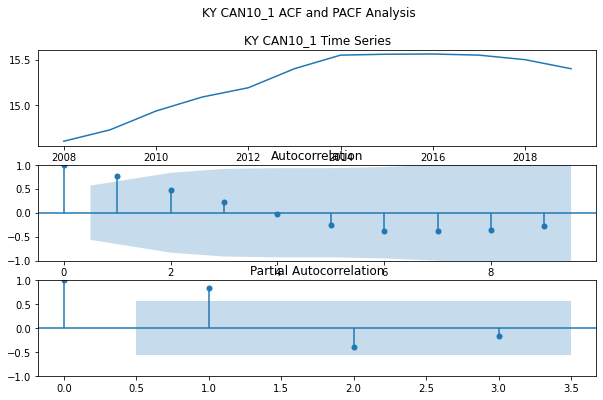

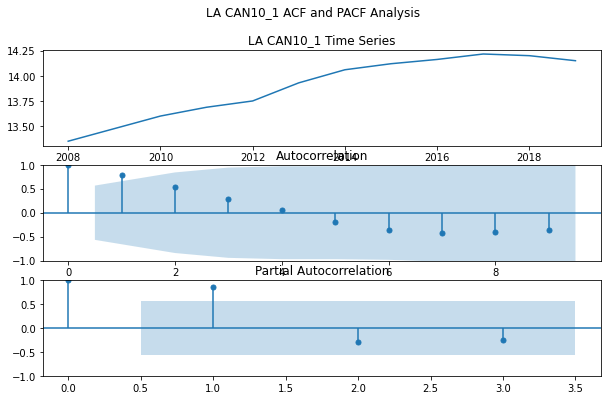

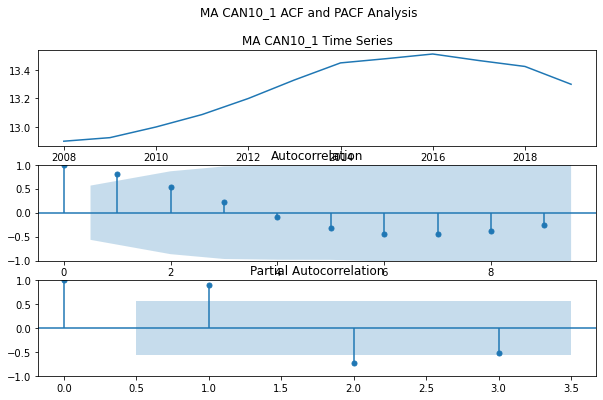

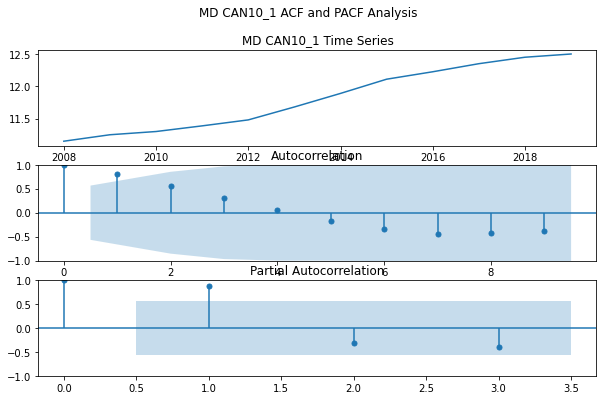

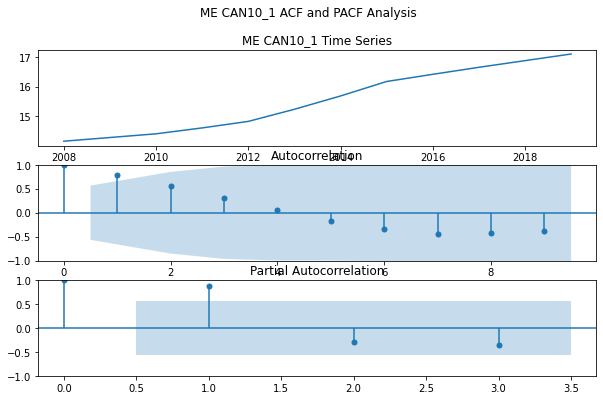

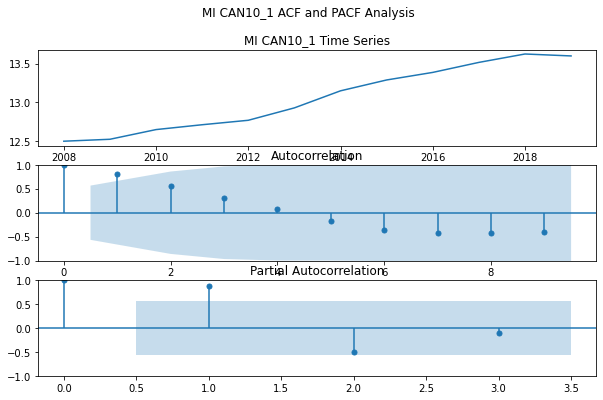

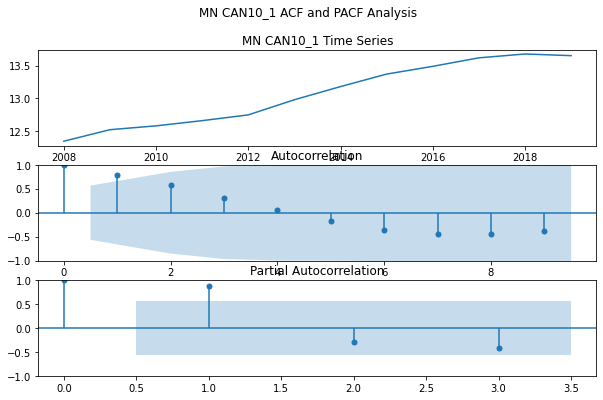

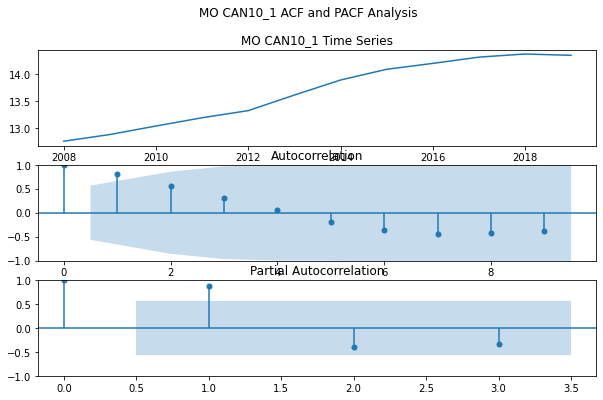

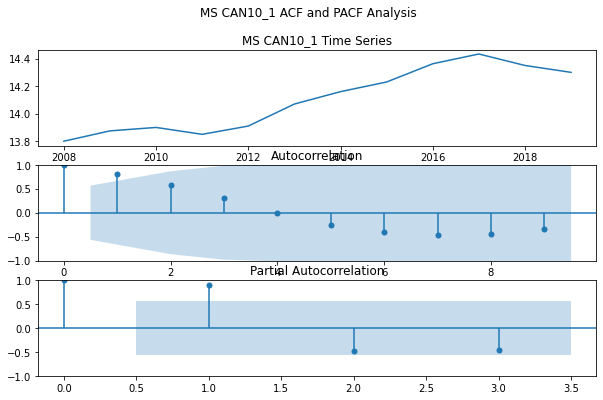

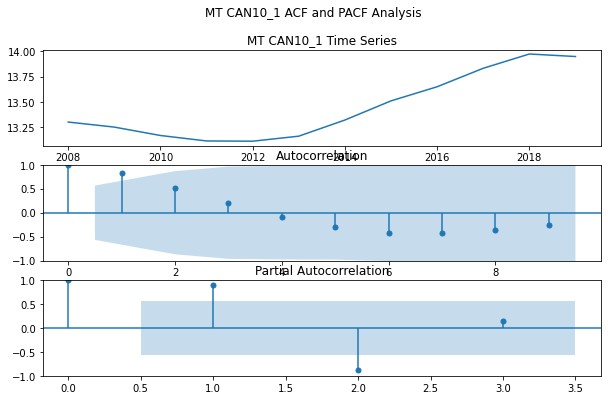

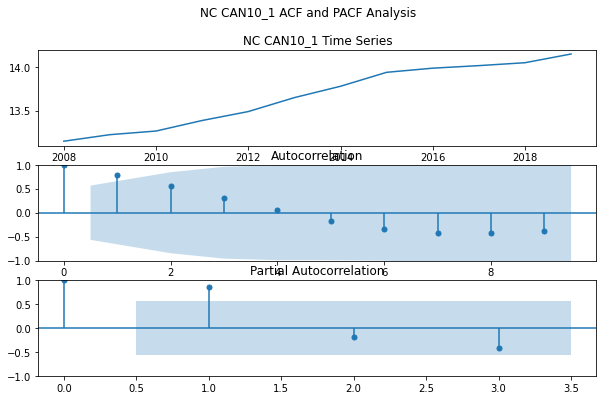

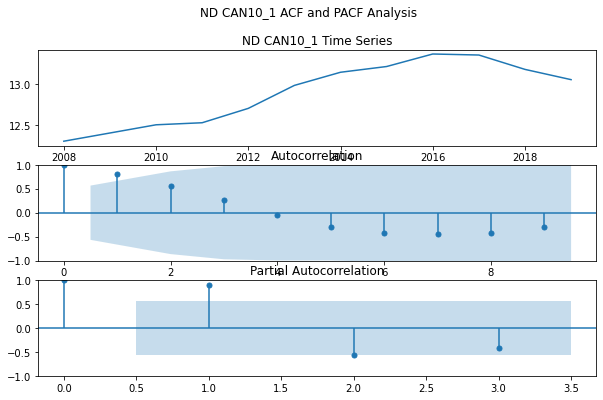

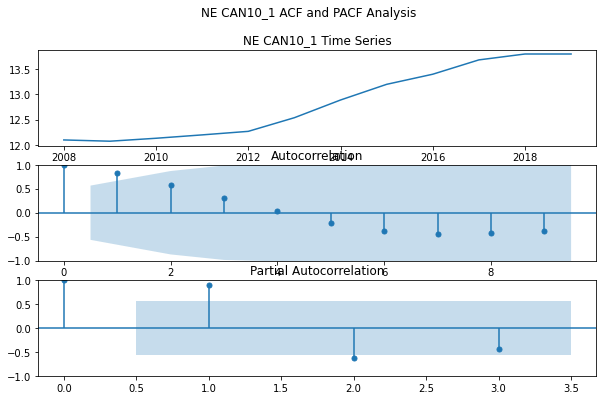

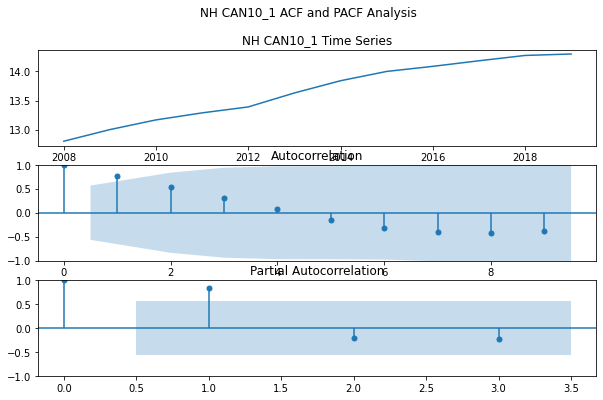

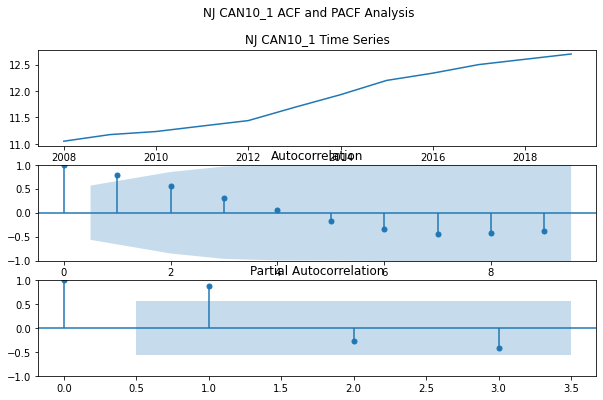

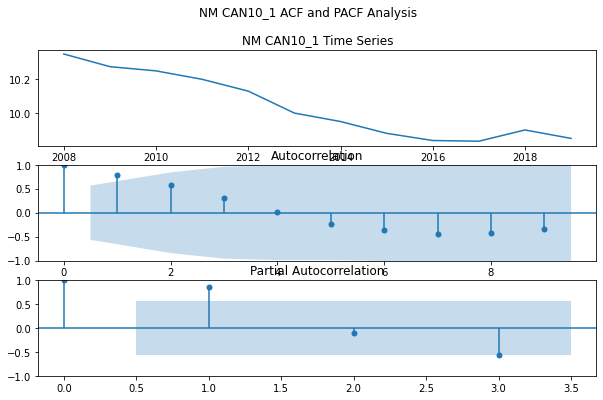

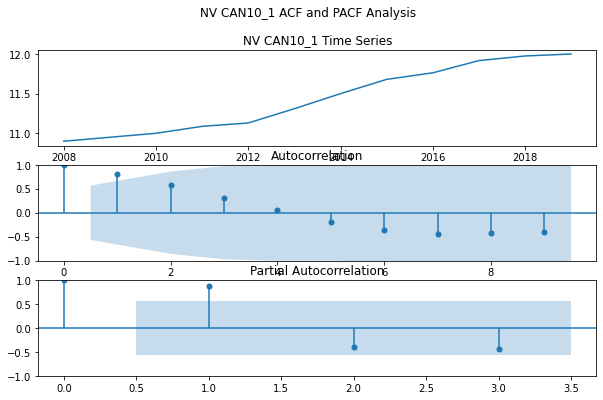

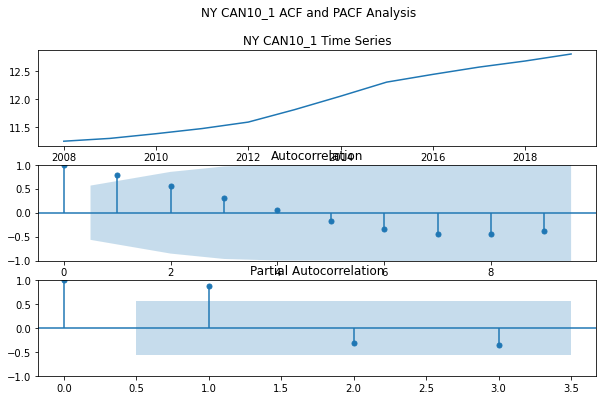

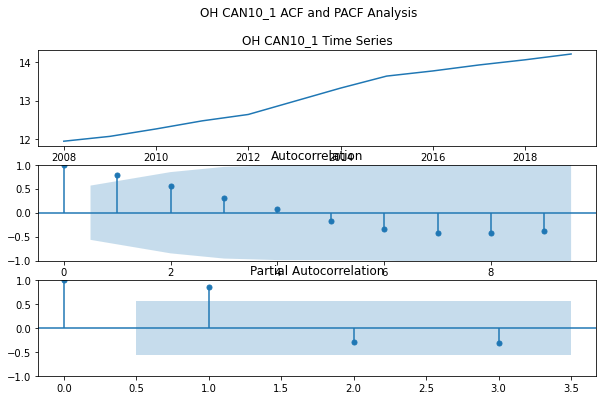

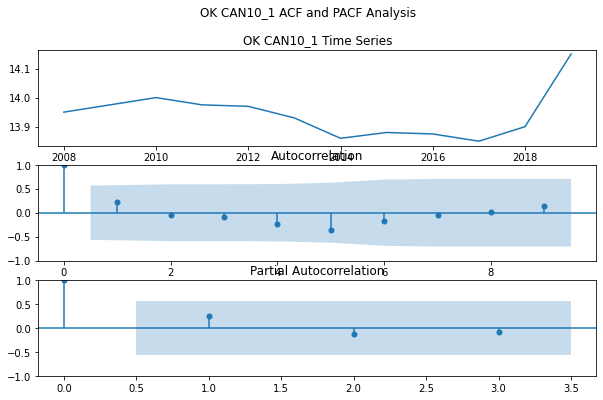

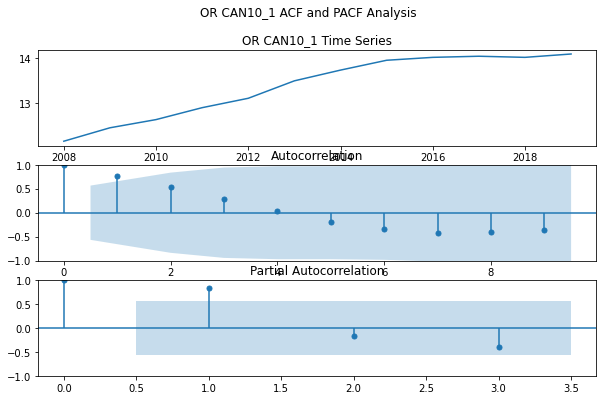

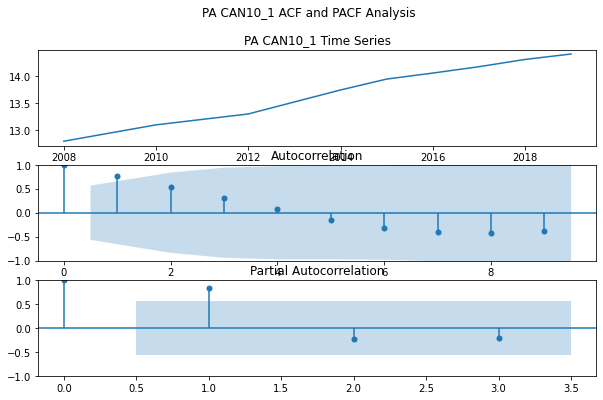

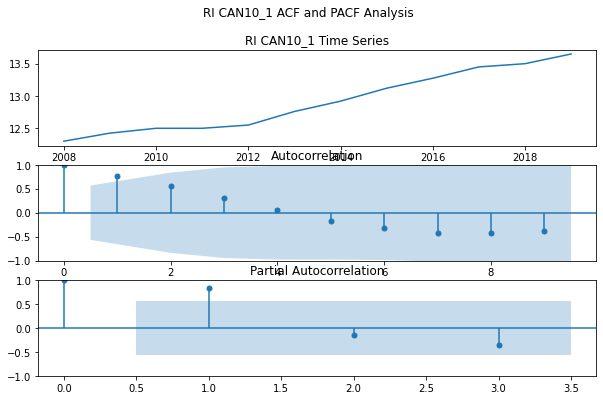

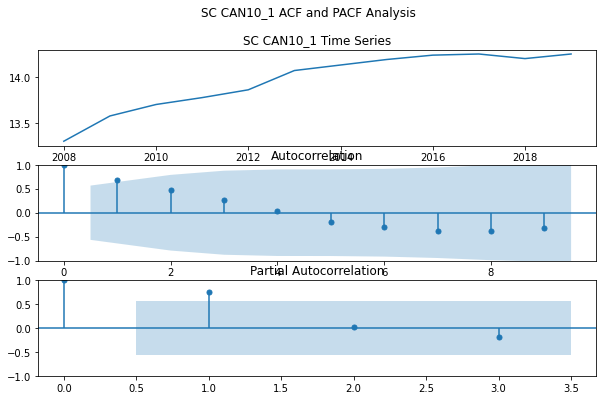

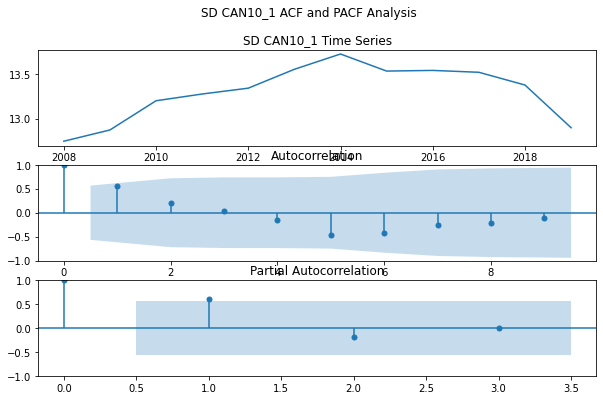

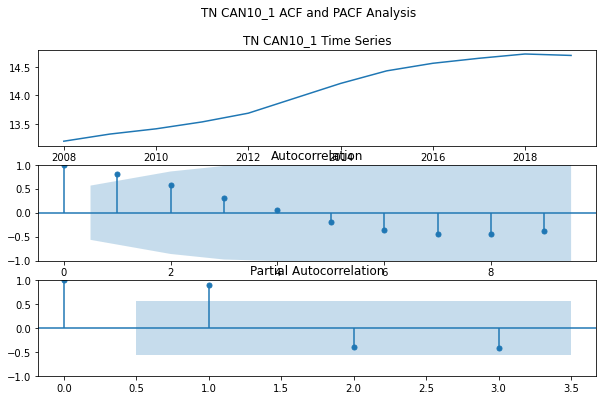

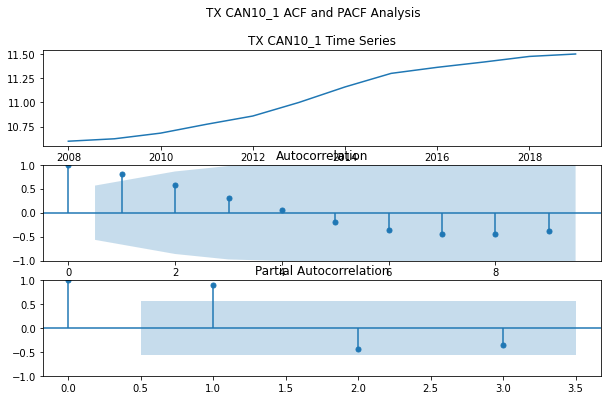

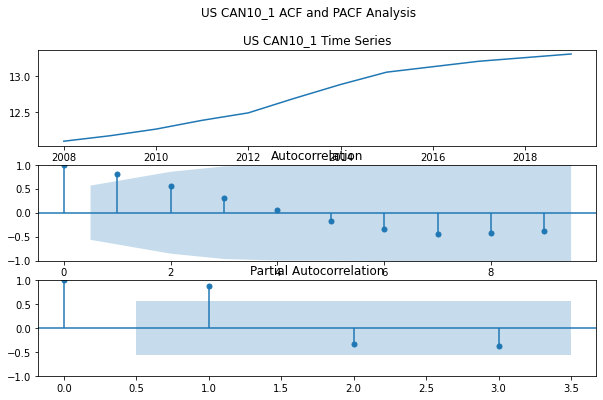

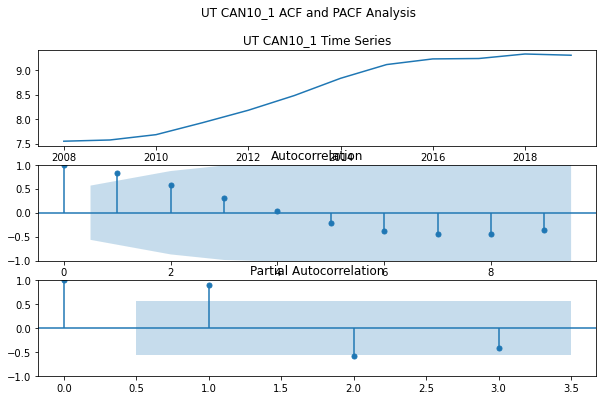

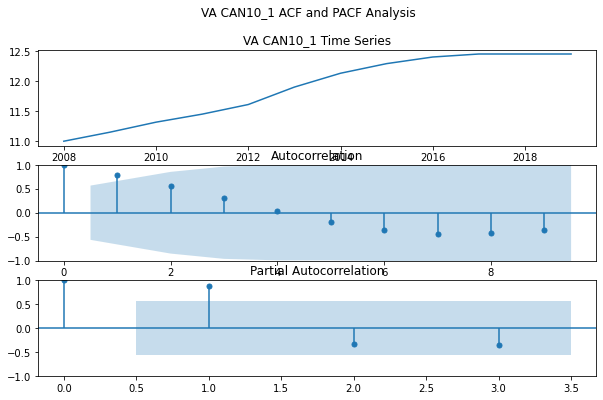

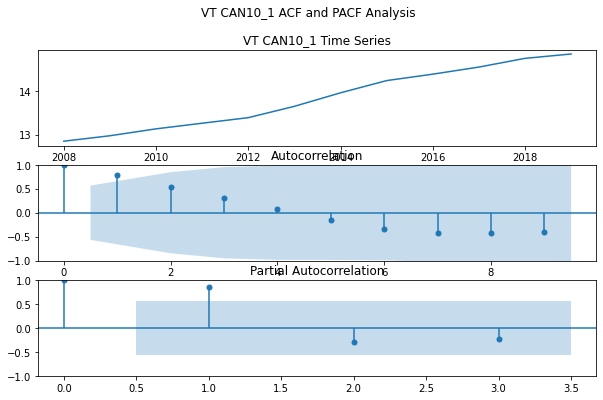

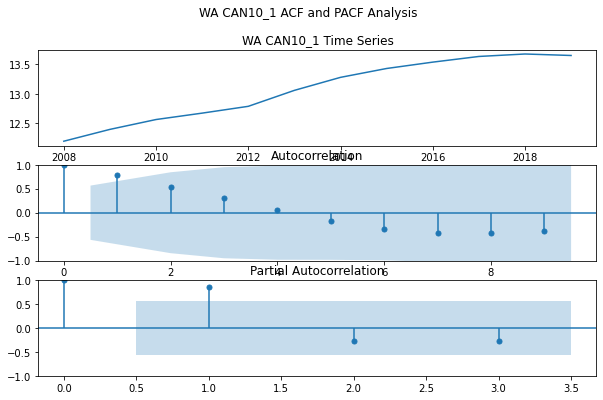

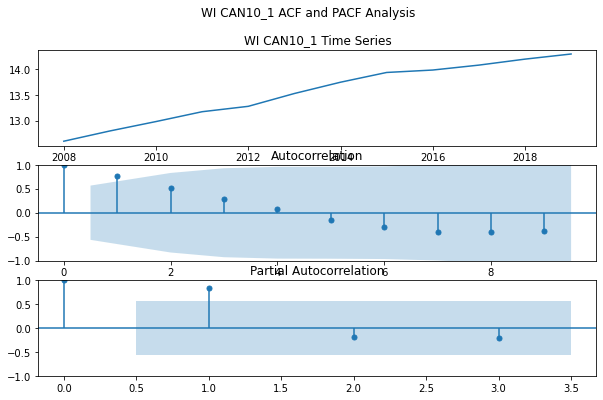

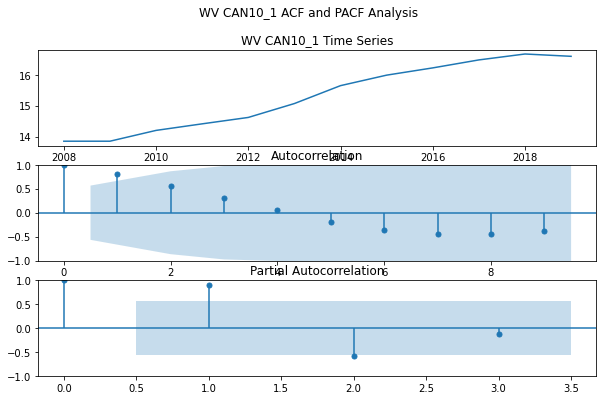

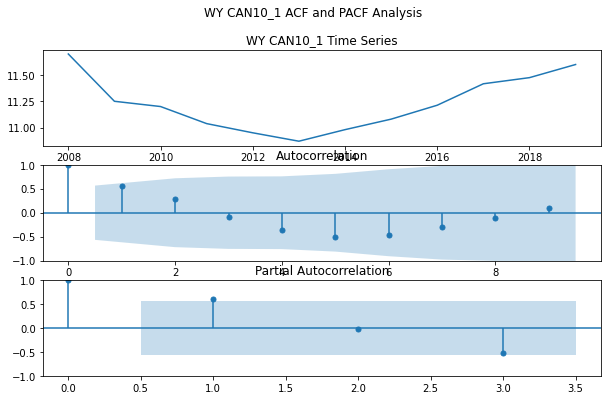

In [83]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Pivot the dataframe to have 'Year' as columns and 'State' as rows
df_pivot = A.pivot(index='State', columns='Year', values='CAN10_1')

# Loop over each state
for state in df_pivot.index:
    # Get the time series for the state
    ts = df_pivot.loc[state].dropna()
    # Perform ACF and PACF analysis
    fig, axes = plt.subplots(3, 1, figsize=(10, 6))
    ts.plot(ax=axes[0])
    axes[0].set_title(f"{state} CAN10_1 Time Series")
    sm.graphics.tsa.plot_acf(ts, lags=9, ax=axes[1])
    sm.graphics.tsa.plot_pacf(ts, lags=3, ax=axes[2])
    fig.suptitle(f"{state} CAN10_1 ACF and PACF Analysis")
    plt.show()


In [87]:
for i in (ny,tex,cal):
    
    for column in tex.columns:
        # Fit an ARIMA model using the auto_arima function
        model = auto_arima(i[column], seasonal=False, error_action="ignore")
        print(f'Column: {column}, ARIMA Model: {model.order}')
        forecast = model.predict(n_periods=3)
        print(f"Predictions for {column}: {forecast}")
    
        # Get the MAE 
        print('MAE: ',mean_absolute_error(tex1[column][-4:-1], forecast))
 
        # Get the MSE 
        print('MSE: ',mean_squared_error(tex1[column][-4:-1], forecast))

        print('R squered: ',r2_score(tex1[column][-4:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for CAN10_1: 8     12.537935
9     12.751752
10    12.930907
dtype: float64
MAE:  1.3221423110252435
MSE:  1.761254727201749
R squered:  -833.5835928532026
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for CAN11_1: 8     141.669490
9     144.563926
10    148.267045
dtype: float64
MAE:  46.2723760464406
MSE:  2143.181651915051
R squered:  -1330.3090967349124
Column: CAN5_1, ARIMA Model: (2, 0, 1)
Predictions for CAN5_1: 8     149.141380
9     150.822647
10    152.408791
dtype: float64
MAE:  32.29371724896533
MSE:  1043.456221726781
R squered:  -3052.8802749602933
Column: CAN6_1, ARIMA Model: (2, 0, 1)
Predictions for CAN6_1: 8     8.096647
9     8.126198
10    8.156870
dtype: float64
MAE:  1.1775948834584191
MSE:  1.386822962235855
R squered:  -5704.7859017705605
Column: CAN7_1, ARIMA Model: (1, 0, 1)
Predictions for CAN7_1: 8     42.084728
9     42.166253
10    42.244294
dtype: float64
MAE:  4.266480713316139
MSE:  18.2040050747

In [88]:
forecast

8     21.765965
9     21.689914
10    21.462636
dtype: float64

In [110]:
results_df = pd.DataFrame(columns=['State', 'Cancer', 'Accuracy'])

In [111]:
for i, state in zip([ny, tex, cal], ['New York', 'Texas', 'California']):
    for column in i.columns:
        # Fit an ARIMA model using the auto_arima function
        model = auto_arima(i[column], seasonal=False, error_action="ignore")
        forecast = model.predict(n_periods=3)
        mse = mean_squared_error(i[column][-4:-1], forecast)
        #print(f'State: {state}, Cancer: {column}, MSE: {mse}')
        #print('\n')
        results_df = results_df.append({'State': state, 'Cancer': column, 'Accuracy': mse}, ignore_index=True)

In [112]:
results_df

,State,Cancer,Accuracy
0,New York,CAN10_1,0.853825
1,New York,CAN11_1,34.060674
2,New York,CAN5_1,48.181917
3,New York,CAN6_1,0.002479
4,New York,CAN7_1,1.610153
5,New York,CAN8_1,0.173833
6,New York,CAN9_1,0.337704
7,Texas,CAN10_1,0.145089
8,Texas,CAN11_1,35.999315
9,Texas,CAN5_1,6.225336
